<a href="https://colab.research.google.com/github/brilliant168/brilliant168/blob/main/All_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
heart_data = pd.read_csv("/content/heart.csv")
diabities_data = pd.read_csv("/content/diabetes.csv")
breast_can_data = pd.read_csv("/content/data.csv")
kidney_data = pd.read_csv("/content/kidney_disease.csv")
liver_data = pd.read_csv("/content/indian_liver_patient.csv")

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
diabities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
breast_can_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# EDA --- 

numeric_features = ['age','sex','trestbps','chol','thalach','oldpeak','ca']
eda_df = heart_data.loc[:,numeric_features].copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

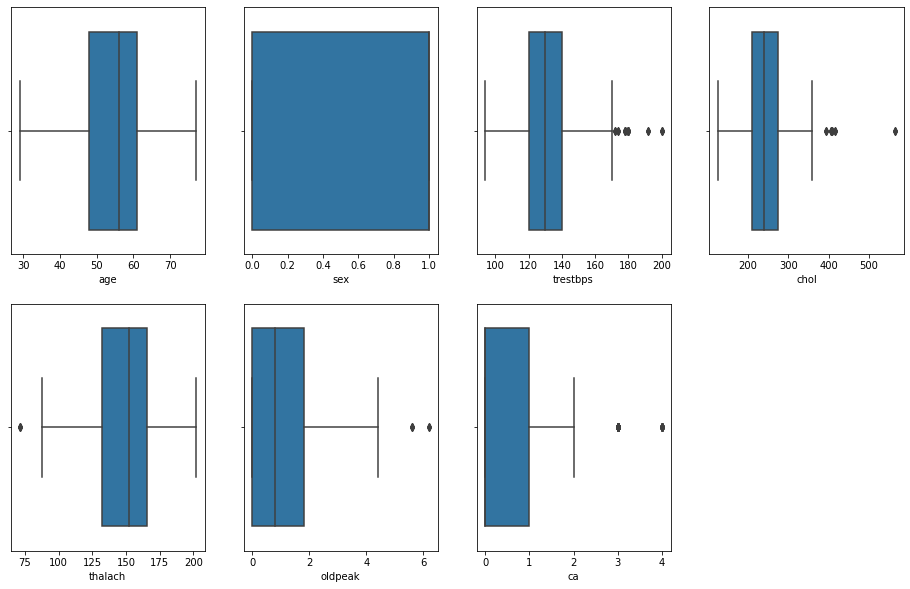

In [ ]:
plt.figure(figsize = (16,10))

for i in range(len(eda_df.columns)):
  plt.subplot(2,4,i+1)
  sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

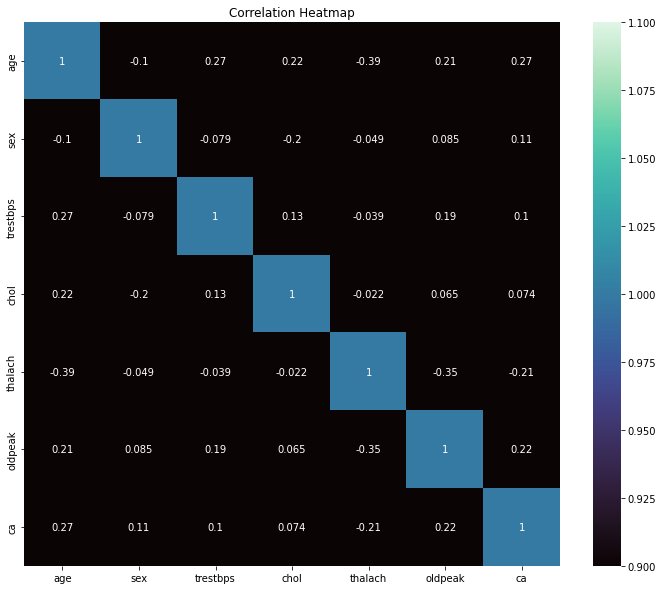

In [ ]:
corr = eda_df.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, vmin = 1.0,cmap = 'mako')
plt.title("Correlation Heatmap")
plt.show()

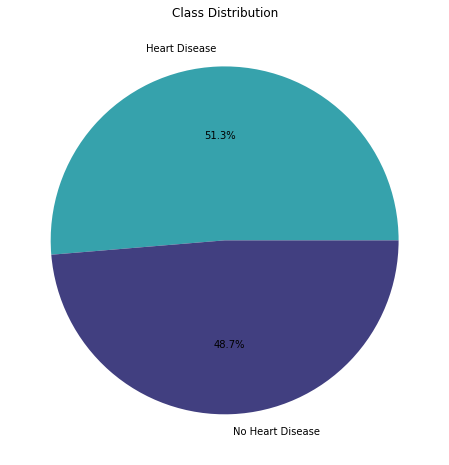

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(heart_data['target'].value_counts(),labels =['Heart Disease','No Heart Disease'], autopct = '%.1f%%', colors = ['#36a2ac','#413f80'])
plt.title('Class Distribution')
plt.show()

# Preprocessing 

In [ ]:
pd.get_dummies(heart_data['thal'],prefix = 'TH')

,TH_0,TH_1,TH_2,TH_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1020,0,0,1,0
1021,0,0,0,1
1022,0,0,1,0
1023,0,0,1,0


In [ ]:
def onehot_encode(df,column_dict):
  df = df.copy()
  for column, prefix in column_dict.items():
    dummies = pd.get_dummies(df[column], prefix = prefix)
    df = pd.concat([df,dummies],axis = 1).copy()
    df = df.drop(column,axis =1)
    return df

In [ ]:
nominal_feature =  ['cp','slop','thal']

In [ ]:
def preprocessing(df,scaler):
  df = df.copy()
  nominal_feature = ['cp','slop','thal']
  df = onehot_encode(df,dict(zip(nominal_feature, ['CP','SL','TH'])))

  y = df['target'].copy()
  x = df.drop('target',axis = 1).copy()

  x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
  return x,y

In [ ]:
x,y = preprocessing(heart_data, StandardScaler())

In [ ]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,CP_0,CP_1,CP_2,CP_3
0,-0.268437,0.661504,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,1.030715,-0.441179,-0.619085,-0.284998
1,-0.158157,0.661504,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,1.030715,-0.441179,-0.619085,-0.284998
2,1.716595,0.661504,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,1.030715,-0.441179,-0.619085,-0.284998
3,0.724079,0.661504,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,1.030715,-0.441179,-0.619085,-0.284998
4,0.834359,-1.511706,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.030715,-0.441179,-0.619085,-0.284998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.970200,2.266655,-0.619085,-0.284998
1021,0.613800,0.661504,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,1.030715,-0.441179,-0.619085,-0.284998
1022,-0.819834,0.661504,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,1.030715,-0.441179,-0.619085,-0.284998
1023,-0.488996,-1.511706,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.030715,-0.441179,-0.619085,-0.284998


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
pd.get_dummies(x['thal'])

,-3.746070,-2.134096,-0.522122,1.089852
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1020,0,0,1,0
1021,0,0,0,1
1022,0,0,1,0
1023,0,0,1,0


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
{column : len(x[column].unique()) for column in x.columns}

{'CP_0': 2,
 'CP_1': 2,
 'CP_2': 2,
 'CP_3': 2,
 'age': 41,
 'ca': 5,
 'chol': 152,
 'exang': 2,
 'fbs': 2,
 'oldpeak': 40,
 'restecg': 3,
 'sex': 2,
 'slope': 3,
 'thal': 4,
 'thalach': 91,
 'trestbps': 49}

## **Training**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [ ]:
lr = LogisticRegression()
svm = SVC()
nn_model = MLPClassifier()

In [ ]:
lr.fit(x_train, y_train)
nn_model.fit(x_train,y_train)
svm.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


SVC()

In [ ]:
print("Logistic regression accuracy: {:.2f}".format(lr.score(x_test,y_test)*100))
print("SVC accuracy: {:.2f}".format(svm.score(x_test,y_test)*100))
print("MLPC accuracy: {:.2f}".format(nn_model.score(x_test,y_test)*100))

Logistic regression accuracy: 85.37
SVC accuracy: 94.15
MLPC accuracy: 99.02
